## 1. 数据处理和分析

In [259]:
import pandas as pd

### 数据预处理

读取从 [UN Comtrade Database](https://comtrade.un.org/data/) 获取的 2019 年全球铜及其精炼物（2603）贸易记录，并处理：

1. 去除贸易对象为 World 的数据行
2. 并保留关心的数据列：报告者及其代码、贸易对象及代码、贸易类型、贸易额
3. 获取所有贸易参与者
4. 划分进口记录和出口记录

*!数据中的贸易对象主要为国家和地区，可能包含**中国**港澳台地区，方便起见，以下将它们统称为“国家”*


In [260]:
resourceData = pd.read_csv('2019-world-copper-2063-trade.csv')
data = (
    resourceData[resourceData["Partner Code"] != 0]
    .loc[:, ["Reporter Code", "Reporter", "Partner Code", "Partner", "Trade Flow", "Trade Value (US$)"]]
)

# data.head()

In [262]:
allReporters = data.loc[:, ["Reporter Code", "Reporter"]].drop_duplicates()
allPartners = data.loc[:, ["Partner Code", "Partner"]].drop_duplicates()

allReporters.rename(columns = { "Reporter Code": "Code", "Reporter": "name" }, inplace=True)
allPartners.rename(columns = { "Partner Code": "Code", "Partner": "name" }, inplace=True)


allParticipants = pd.concat([allReporters, allPartners]).drop_duplicates()



In [263]:
allImportLog = pd.concat([
    data[data["Trade Flow"] == "Import"],
    data[data["Trade Flow"] == "Re-Import"]
])

allExportLog = pd.concat([
    data[data["Trade Flow"] == "Export"],
    data[data["Trade Flow"] == "Re-Export"]
])


In [ ]:
groupedDataOfImport = allImportLog.groupby("Reporter Code")

groupedDataOfExport = allExportLog.groupby("Partner Code")

### 数据验证和分析

In [264]:

print("上报进贸易记录的国家总数（不含重复）: ", allReporters.shape[0])
print("上报进贸易记录的中的贸易对象国家总数（不含重复）: ", allPartners.shape[0])
print("上报进贸易记录的国家，和记录中的贸易对象国家总数（不含重复）: ", allParticipants.shape[0])

上报进贸易记录的国家总数（不含重复）:  89
上报进贸易记录的中的贸易对象国家总数（不含重复）:  109
上报进贸易记录的国家，和记录中的贸易对象国家总数（不含重复）:  119


从上面数据可以看出，各国上报的记录显然是有出入的，即上报记录中涉及的国家数要比上报数据的国家数多，这至少说明了一些参与了贸易的国家没有上报贸易记录

下面以中国上报的记录为例检查和说明：

1. 查看中国上报的进口记录：

In [265]:
ChinaImportReport = groupedDataOfImport.get_group(156)

partnerNum = ChinaImportReport.shape[0]
print("中国上报的进口记录中，涉及出口国家的个数: ", partnerNum)

ChinaImportReport.head(partnerNum)

中国上报的进口记录中，涉及出口国家的个数:  56


Reporter Code Reporter  Partner Code                           Partner  \
247            156    China             8                           Albania   
248            156    China            36                         Australia   
250            156    China            51                           Armenia   
251            156    China            68  Bolivia (Plurinational State of)   
252            156    China            76                            Brazil   
255            156    China           100                          Bulgaria   
256            156    China           104                           Myanmar   
258            156    China           124                            Canada   
260            156    China           152                             Chile   
261            156    China           170                          Colombia   
262            156    China           178                             Congo   
263            156    China           180            Dem. Rep. of the Congo   
265            156    China           212                          Dominica   
266            156    China           214                    Dominican Rep.   
267            156    China           218                           Ecuador   
268            156    China           231                          Ethiopia   
269            156    China           232                           Eritrea   
271            156    China           360                         Indonesia   
272            156    China           364                              Iran   
275            156    China           398                        Kazakhstan   
276            156    China           404                             Kenya   
278            156    China           410                     Rep. of Korea   
279            156    China           417                        Kyrgyzstan   
280            156    China           418            Lao People's Dem. Rep.   
281            156    China           450                        Madagascar   
282            156    China           458                          Malaysia   
283            156    China           478                        Mauritania   
284            156    China           484                            Mexico   
285            156    China           490                   Other Asia, nes   
286            156    China           496                          Mongolia   
287            156    China           504                           Morocco   
288            156    China           508                        Mozambique   
289            156    China           516                           Namibia   
290            156    China           566                           Nigeria   
292            156    China           586                          Pakistan   
293            156    China           591                            Panama   
294            156    China           598                  Papua New Guinea   
295            156    China           604                              Peru   
296            156    China           608                       Philippines   
297            156    China           642                           Romania   
298            156    China           643                Russian Federation   
299            156    China           682                      Saudi Arabia   
300            156    China           688                            Serbia   
301            156    China           699                             India   
302            156    China           704                          Viet Nam   
303            156    China           706                           Somalia   
304            156    China           710                      South Africa   
305            156    China           716                          Zimbabwe   
306            156    China           724                             Spain   
307            156    China           764              

2. 查看中国进口对象上报的对中国的出口记录

In [266]:
partnersChinaImportFrom = ChinaImportReport.loc[:,"Partner Code"]

partnersExportToChina = groupedDataOfExport.get_group(156)

reportOfPartnersExportToChina = partnersExportToChina[partnersExportToChina["Partner Code"] == 156]

partnerNum = reportOfPartnersExportToChina.shape[0]
print("中上报的进口记录中，进口对象的个数: ", partnerNum)

reportOfPartnersExportToChina.head(partnerNum)


中上报的进口记录中，进口对象的个数:  43


Reporter Code                          Reporter  Partner Code Partner  \
13               36                         Australia           156   China   
36               51                           Armenia           156   China   
68               68  Bolivia (Plurinational State of)           156   China   
88               76                            Brazil           156   China   
116             100                          Bulgaria           156   China   
161             124                            Canada           156   China   
208             152                             Chile           156   China   
316             170                          Colombia           156   China   
328             204                             Benin           156   China   
334             218                           Ecuador           156   China   
386             276                           Germany           156   China   
416             344              China, Hong Kong SAR           156   China   
427             360                         Indonesia           156   China   
465             381                             Italy           156   China   
507             398                        Kazakhstan           156   China   
515             404                             Kenya           156   China   
526             410                     Rep. of Korea           156   China   
550             418            Lao People's Dem. Rep.           156   China   
562             450                        Madagascar           156   China   
571             458                          Malaysia           156   China   
600             490                   Other Asia, nes           156   China   
616             496                          Mongolia           156   China   
621             504                           Morocco           156   China   
635             516                           Namibia           156   China   
685             586                          Pakistan           156   China   
700             604                              Peru           156   China   
731             608                       Philippines           156   China   
780             643                Russian Federation           156   China   
793             688                            Serbia           156   China   
805             699                             India           156   China   
835             704                          Viet Nam           156   China   
854             710                      South Africa           156   China   
896             724                             Spain           156   China   
980             792                            Turkey           156   China   
1028            842                               USA           156   China   
1069            894                            Zambia           156   China   
1086            180            Dem. Rep. of the Congo           156   China   
1106            268                           Georgia           156   China   
1122            478                        Mauritania           156   China   
1129            484                            Mexico           156   China   
1142            682                      Saudi Arabia           156   China   
636             516                           Namibia           156   China   
1107            268                           Georgia           156   China   

     Trade Flow  Trade Value (US$)  
13       Export         1585564428  
36       Export          174415305  
68       Export            3882938  
88       Export          442971407  
116      Export           71216190  
161      Export          764979617  
208      Export         9649325301  
316      Export           40352028  
328      Export               1708  
334      Export            3562481  
386      Export            7449316  
416      Export             152061  
427      Export          599729496  
465      Ex

对比上面两个表格，显然各国出入口数据是**普遍**有出入的：

首先，进出口对象数量上就不一致：中国上报记录中显示，中国 2019 年共从 56 个国家进口铜资源；而只有 43 个国家上报了对中国出口铜资源的记录

其次，对于有些进出口双方都上报了记录的情况，双方上报的贸易金额不一致，有的甚至出入较大

这可能是有以下的原因导致的：

1. 由于政策和统计方法不同导致的上报数据的结果不同. 
2. 由于货物在进出口过程中经第三方国家中转，而进出口国家对于出入口的目标国家登记不一致导致.
3. 其他可能原因.

## 2. 构建网络

根据以上数据和分析，构建网络：

1. 以国家为节点，进出口关系为指向（出口国 -> 进口国），构建有向无权图

2. 对于进出口关系，忽略各个国家之间上报数据的差异，即只要在任何一条记录中出现进出口关系即双方存在贸易关系，则为对应节点添加连边

In [285]:
import networkx as nx 

G = nx.DiGraph()

In [286]:
for row in allParticipants.itertuples():
    try:
        selfImportLog = groupedDataOfImport.get_group(row.Code)
        for log in selfImportLog.itertuples():
            G.add_node(log._3, label=log.Partner)
            G.add_node(log._1, label=log.Reporter)
            G.add_edge(log._3, log._1, tradeValue=log._6)
    except KeyError: None

    try:
        exportPartnerLog = groupedDataOfExport.get_group(row.Code)
        for log in exportPartnerLog.itertuples():
            G.add_node(log._3, label=log.Partner)
            G.add_node(log._1, label=log.Reporter)
            G.add_edge(log._1, log._3, tradeValue=log._6)
    except KeyError: None



获得节点字典

In [287]:
nodesDict = dict(G.nodes(data=True))

获得节点强度，以及其取值范围

In [288]:
nodeStrength = list(G.degree(weight="tradeValue"))

sortedNodeStrenght = sorted(nodeStrength, key = lambda item: item[1])

minStrength = sortedNodeStrenght[0][1]
maxStrength = sortedNodeStrenght[-1][1]

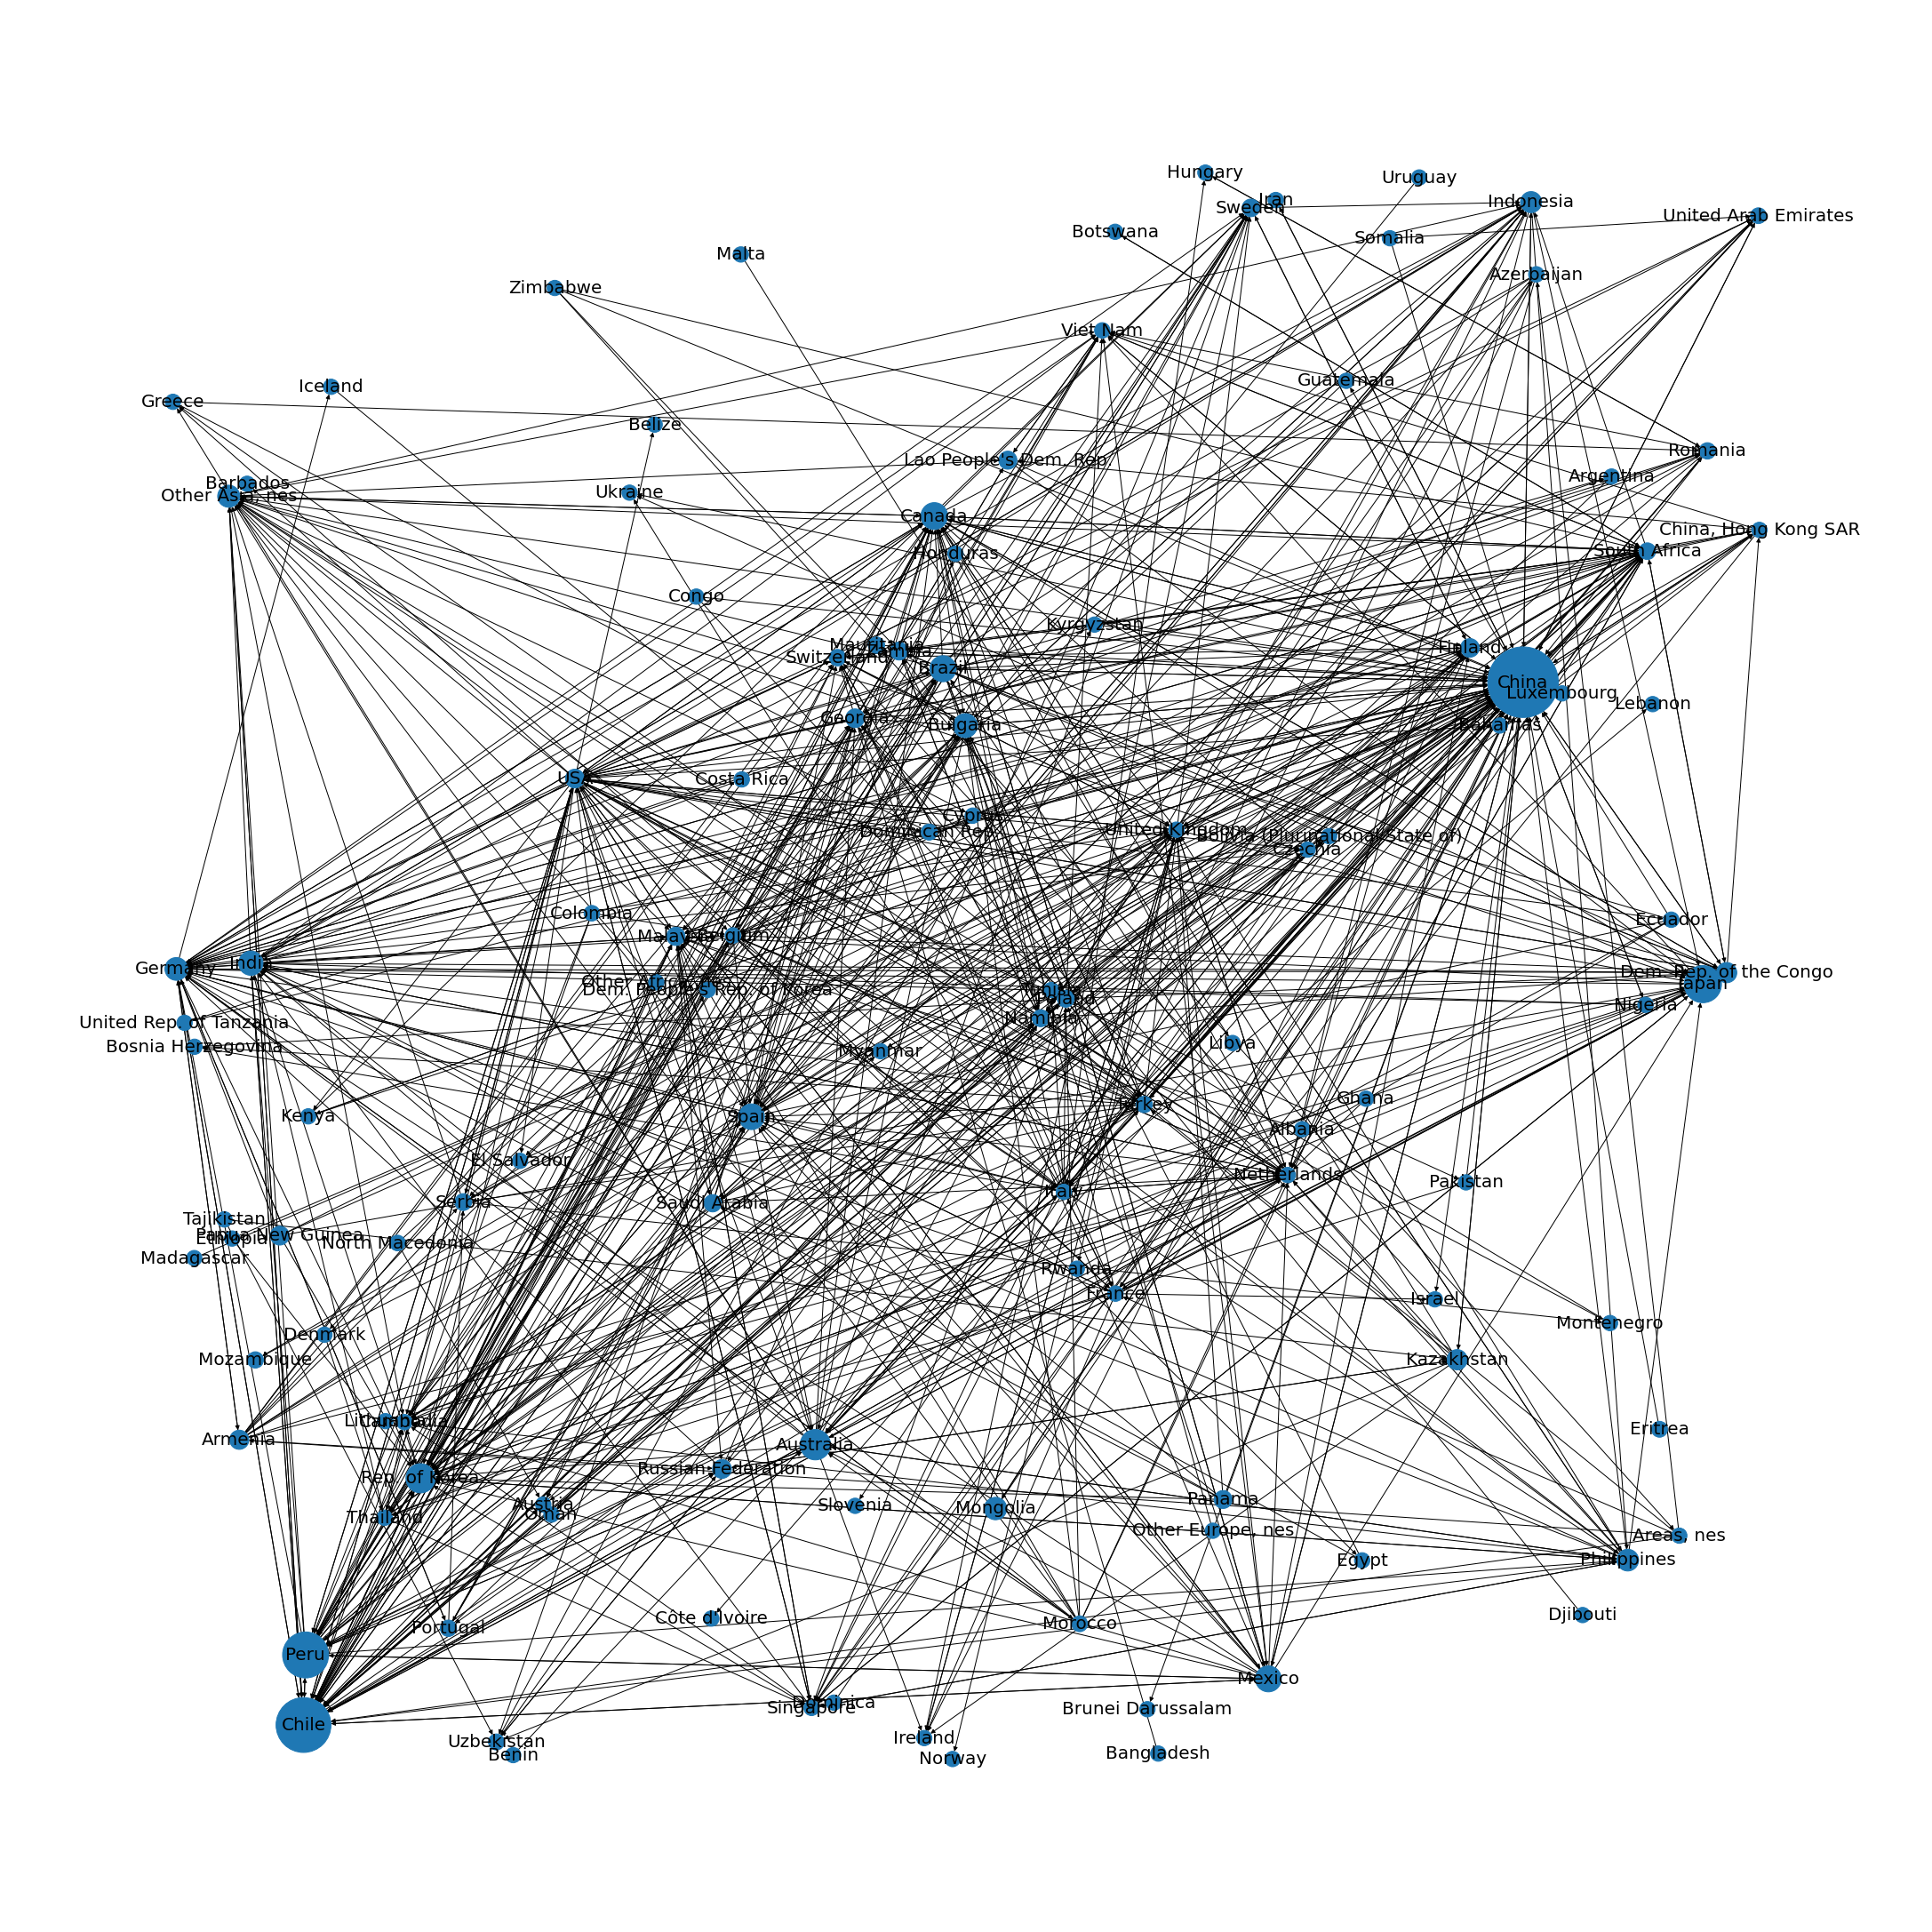

In [290]:
import matplotlib.pyplot as plt

node_sizes = [ 300 + (item[1] - minStrength) / (maxStrength - minStrength) * 6000 for item in nodeStrength ]

plt.figure(3, figsize=(30, 30))
pos = nx.random_layout(G)
# pos = nx.spiral_layout(G)
nx.draw(G, pos, with_labels=False, node_size=node_sizes)

node_labels = nx.get_node_attributes(G, 'label') 
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=20)

# edge_labels = nx.get_edge_attributes(G, 'tradeValue')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=20)

plt.show()


## 3.节点流量和基于熵的脆弱性

### 3.1 节点的流量：

1. 介数中心性：

节点 $v$ 的介数中心性（Betweenness Centrality，简称介数，BC）定义为网络中任意两节点 $s,t$ 的最短路径中经过节点 $v$ 的条数比上总条数的和：
$$
    BC(v) = \sum_{s,t\in V} \frac{\sigma(s,t|v)}{\sigma(s,t)}
$$

其中，$V$ 是所有节点的集合，$\sigma(s,t)$ 是节点对 $(s,t)$ 的最短路径的条数，$\sigma(s,t|v)$ 是这些最短路径中通过节点 $v(v\notin \{s,t\})$ 的条数. 当 $s=t$ 时记 $\sigma(s,t) = 1$，当 $v\in\{s,t\}$ 时，记 $\sigma(s,t|v) = 0$



2. 归一化的介数：

通常使用归一化的介数，对于**有向图**来说归一化的介数为：
$$
BC(v) = \frac1{(n-1)(n-2)} \sum_{s,t\in V} \frac{\sigma(s,t|v)}{\sigma(s,t)}
$$

3. 节点的信息传递流量：

定义节点 $v$ 的信息传递流量 $FL_v$ 如下：

$$
FL_v = \gamma BC(v) + (1-\gamma)\sum_{u\in\Omega_u} BC(u)
$$

In [324]:
FLs = {}
for node, bc in nx.betweenness_centrality(G):
    FLs[node] = gamma

{826: 0.046105907842077416, 31: 0.0013308652563324436, 899: 0.0005754122484262698, 842: 0.0662779485434521, 32: 0.0, 276: 0.04652325637118918, 100: 0.01528165899855575, 36: 0.016665375053861276, 152: 0.06949864059900404, 484: 0.004520030265898753, 504: 0.00021117654855274653, 604: 0.01539980049008434, 156: 0.24892083456989864, 246: 0.004470736108852939, 608: 0.0023478863759002436, 710: 0.05238889075071607, 724: 0.03489780547510169, 792: 0.019373642400113463, 180: 0.004306670433531562, 76: 0.0086647150123452, 40: 0.0, 807: 0.0, 51: 0.0013133149827086786, 52: 0.0, 56: 0.01652240785665944, 528: 0.03792092550863732, 68: 0.00046259453039114055, 124: 0.0298109502675807, 170: 0.0, 442: 0.0, 381: 0.040446724412729805, 70: 3.31981264184654e-05, 72: 0.0, 96: 0.0, 268: 0.012569408991136708, 360: 0.007227908794101928, 620: 0.0004373575159494813, 757: 0.017173456967524568, 104: 0.0, 410: 0.012121667553742792, 699: 0.012221346743068144, 116: 0.0, 344: 0.0018198715562180712, 392: 0.002847443514026523